<a href="https://colab.research.google.com/github/galihweb000haha/CNN/blob/main/titanic_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
! kaggle competitions download titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 19.9MB/s]


In [11]:
!unzip "/content/titanic.zip"

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install luwiji
from luwiji.knn import demo, illustration

In [22]:
df = pd.read_csv("train.csv", index_col="PassengerId")

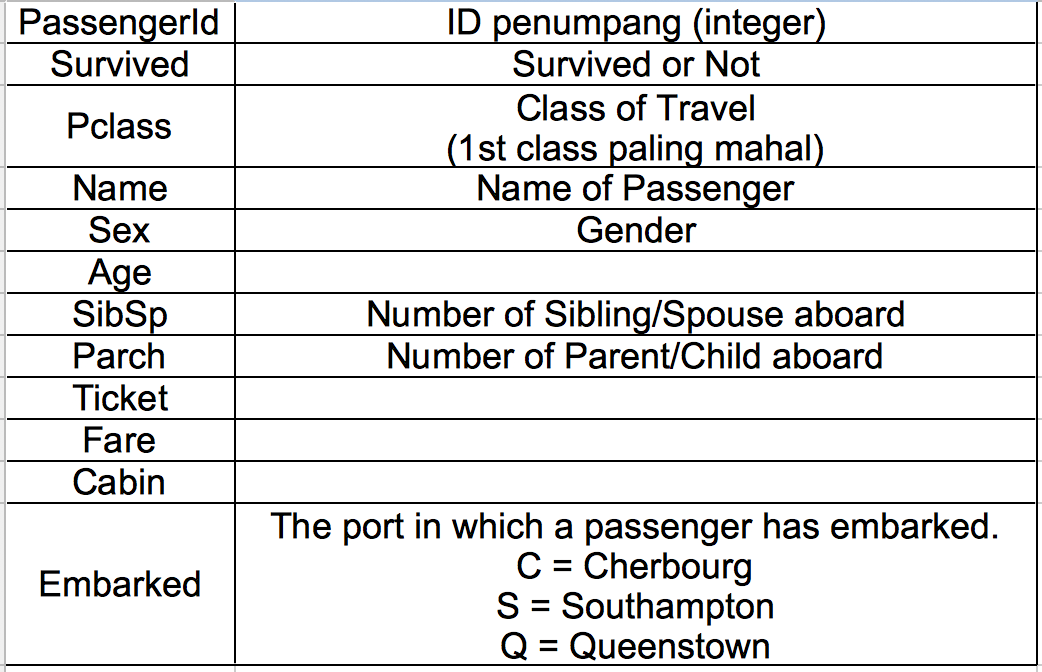

In [19]:
illustration.nomenklatur

In [23]:
df.drop(columns=["Name", "Ticket"], inplace=True)

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


## EDA

In [25]:
from jcopml.plot import plot_missing_value

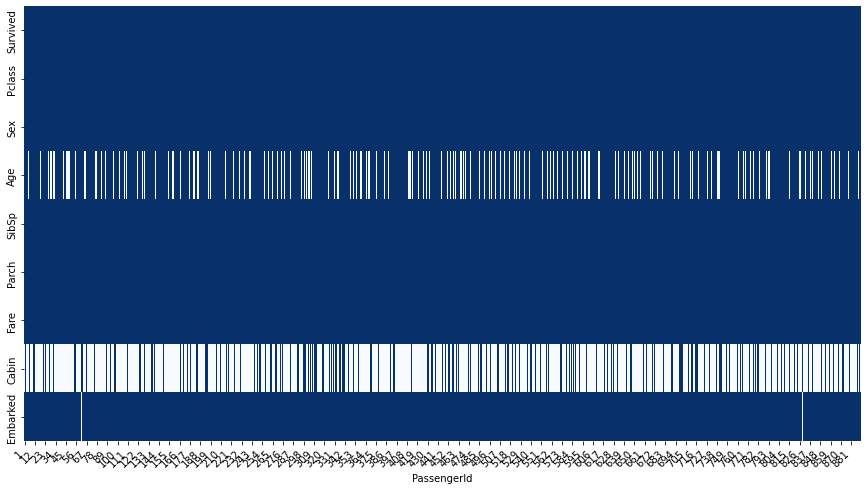

In [26]:
plot_missing_value(df)

In [27]:
df.drop(columns=["Age", "Cabin"], inplace=True)

In [28]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
df.fillna("S", inplace=True)

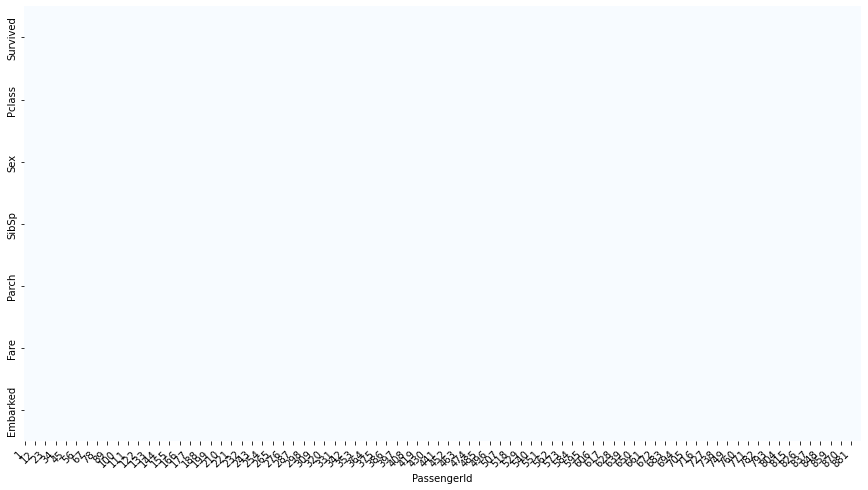

In [31]:
plot_missing_value(df)

## Data Preparation

In [43]:
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

## Train

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.score(X, y)

0.8855218855218855